mu1: 0.0032301729706304084
mu2: 6.729527022146638e-05
mse: 0.0035367663360549918


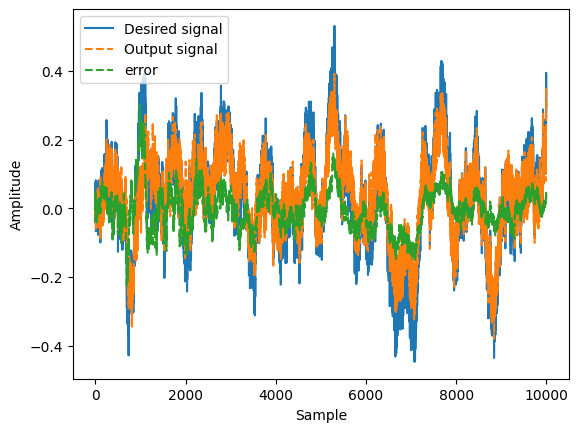

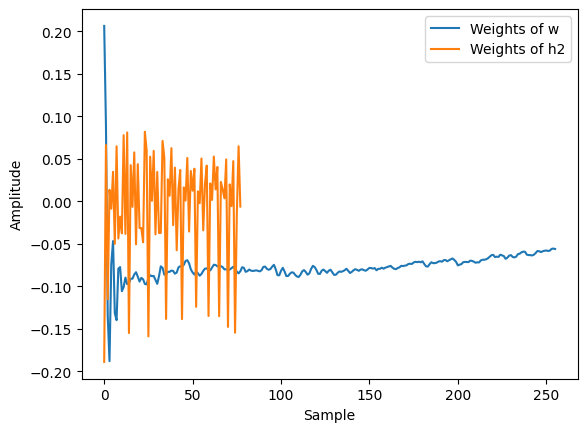

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import freqz, welch
from Signal_proctools import *
# Example usage:
processor = SignalProcessor(96000)

# Read the WAV file
fs, data = wavfile.read("test_IR-96k.wav")

# Plot the impulse response
# Find the index of the maximum value in the array
max_index = np.argmax(data)
ir=data[max_index:max_index+256]
ir = (ir - np.min(ir)) / (np.max(ir) - np.min(ir)) * 2 - 1
ir *=0.2

length=10000
t, reference_sig = processor.generate_noise_signal(length, 0.1)
t, noise = processor.generate_noise_signal(length, 0.01)
d = np.convolve(reference_sig + noise, ir)[:length] #"Desired signal"

# Example parmaters setup:
N = 256
mu = 0.48
mu2= 0.01
y, err,w,h2 = processor.Second_order_Volterra_filter(reference_sig, d, 
                                                     M=N, L=12, 
                                                     mu1=mu, mu2=mu2)
mse=processor.custom_mse(d, y)
print("mse:",mse)

#Plot the results
plt.plot(d, label="Desired signal")
plt.plot(y,'--', label="Output signal")
plt.plot(err,'--',  label="error")
# Add labels and title
plt.xlabel("Sample")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()


#Plot the results of determined IR weights
plt.plot(w, label="Weights of w")
plt.plot(h2, label="Weights of h2")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
# Show the plot
plt.show()


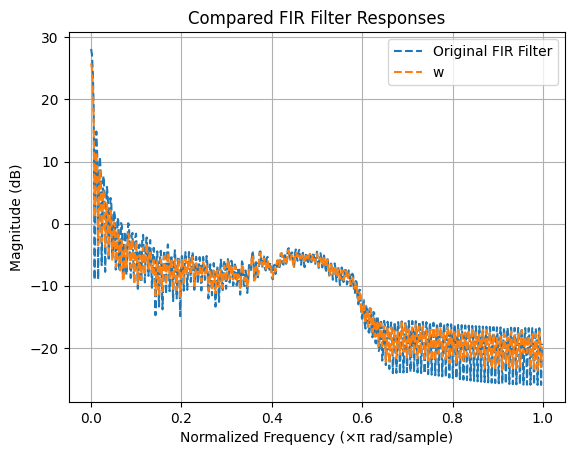

In [16]:
# Frequency response of the optimized IIR filter
freq, response_ = freqz(ir, 1)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_)), label='Original FIR Filter', linestyle='--')

freq, response_ = freqz(w, 1)

# Plotting the responses
plt.plot(freq / np.pi, 20 * np.log10(abs(response_)), label='w', linestyle='--')
plt.title('Compared FIR Filter Responses')
plt.xlabel('Normalized Frequency (×π rad/sample)')
plt.ylabel('Magnitude (dB)')
plt.legend()
plt.grid(True)
plt.show()


mu1: 0.0032301729706304084
mu2: 6.729527022146638e-05
mu3: 6.729527022146638e-05
mse: 0.0024501903749543923


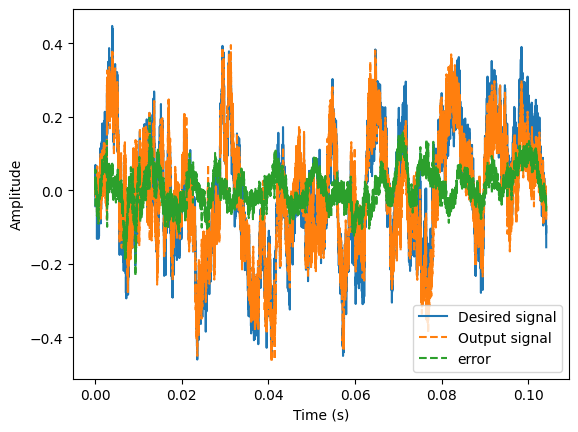

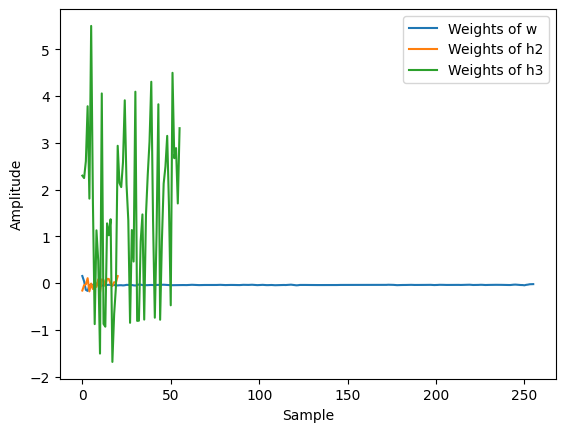

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import freqz, welch
from Signal_proctools import *
# Example usage:
processor = SignalProcessor(96000)

# Read the WAV file
fs, data = wavfile.read("test_IR-96k.wav")

# Plot the impulse response
# Find the index of the maximum value in the array
max_index = np.argmax(data)
ir=data[max_index:max_index+256]
ir = (ir - np.min(ir)) / (np.max(ir) - np.min(ir)) * 2 - 1
ir *=0.2

length=10000
t, reference_sig = processor.generate_noise_signal(length, 0.1)
t, noise = processor.generate_noise_signal(length, 0.01)
d = np.convolve(reference_sig + noise, ir)[:length] #"Desired signal"

# Example parmaters setup:
N = 256
mu = 0.48
mu2= 0.01
mu3= 0.01
y, err,w,h2,h3 = processor.Third_order_Volterra_filter(reference_sig, d, 
                                                     M=N, L=6, 
                                                     mu1=mu, mu2=mu2,mu3=mu3)
mse=processor.custom_mse(d, y)
print("mse:",mse)

#Plot the results
plt.plot(t,d, label="Desired signal")
plt.plot(t,y,'--', label="Output signal")
plt.plot(t,err,'--',  label="error")
# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()


#Plot the results of determined IR weights
plt.plot(w, label="Weights of w")
plt.plot(h2, label="Weights of h2")
plt.plot(h3, label="Weights of h3")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
# Show the plot
plt.show()


mu1: 0.0032301729706304084
mu2: 6.729527022146638e-05
mu3: 6.729527022146638e-05
mu4: 6.729527022146638e-05
mse: 0.0031153175680662826


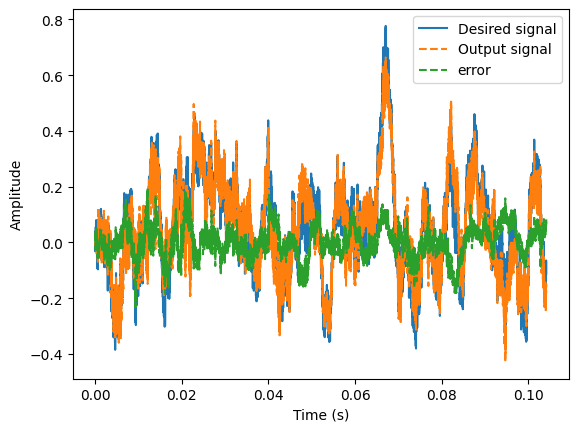

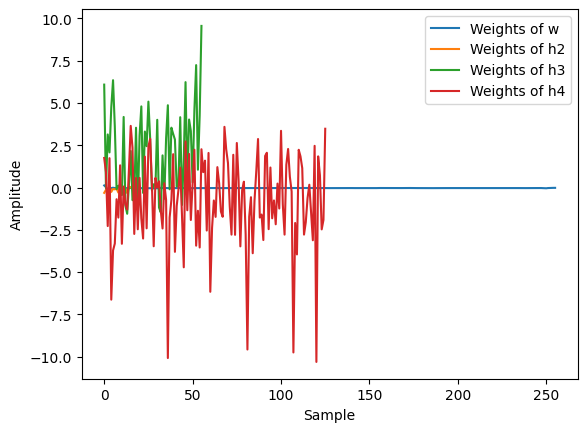

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import freqz, welch
from Signal_proctools import *
# Example usage:
processor = SignalProcessor(96000)

# Read the WAV file
fs, data = wavfile.read("test_IR-96k.wav")

# Plot the impulse response
# Find the index of the maximum value in the array
max_index = np.argmax(data)
ir=data[max_index:max_index+256]
ir = (ir - np.min(ir)) / (np.max(ir) - np.min(ir)) * 2 - 1
ir *=0.2

length=10000
t, reference_sig = processor.generate_noise_signal(length, 0.1)
t, noise = processor.generate_noise_signal(length, 0.01)
d = np.convolve(reference_sig + noise, ir)[:length] #"Desired signal"

# Example parmaters setup:
N = 256
mu = 0.48
mu2= 0.01
mu3= 0.01
mu4= 0.01
y, err,w,h2, h3 ,h4= processor.Fourth_order_Volterra_filter(reference_sig, d, 
                                                     M=N, L=6, 
                                                     mu1=mu, mu2=mu2,mu3=mu3,mu4=mu4)
mse=processor.custom_mse(d, y)
print("mse:",mse)

#Plot the results
plt.plot(t,d, label="Desired signal")
plt.plot(t,y,'--', label="Output signal")
plt.plot(t,err,'--',  label="error")
# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()


#Plot the results of determined IR weights
plt.plot(w, label="Weights of w")
plt.plot(h2, label="Weights of h2")
plt.plot(h3, label="Weights of h3")
plt.plot(h4, label="Weights of h4")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
# Show the plot
plt.show()


/tmp/ipykernel_24881/1821445637.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read("pedal_/whitenoise.wav", mmap=False)
/tmp/ipykernel_24881/1821445637.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, d = wavfile.read("pedal_/Setting4no_latency.wav", mmap=False)


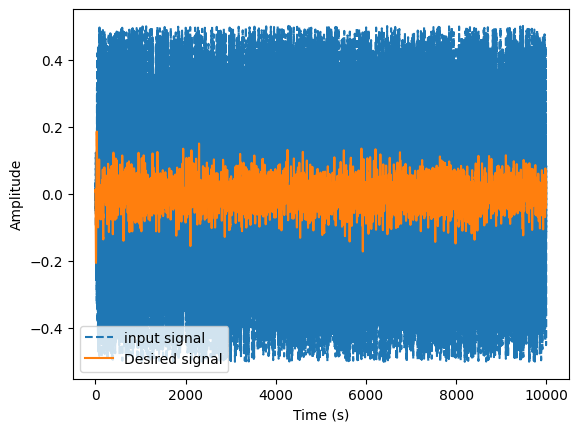

mu1: 0.0018842675662010687
mu2: 6.729527022146638e-05
mu3: 6.7295270221466575e-06
mu4: 6.7295270221466575e-06
mse: 0.0010041358182952013
Estimated error: 0.03168810215672755


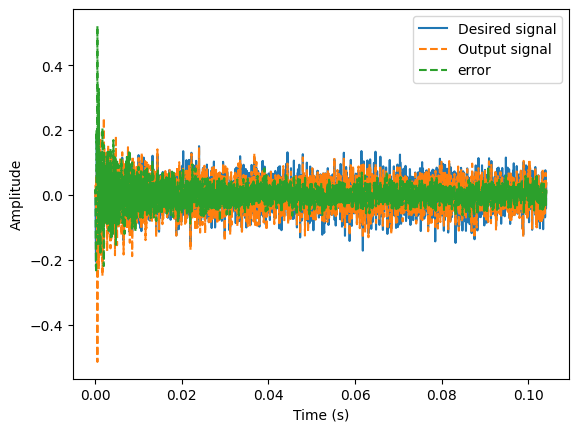

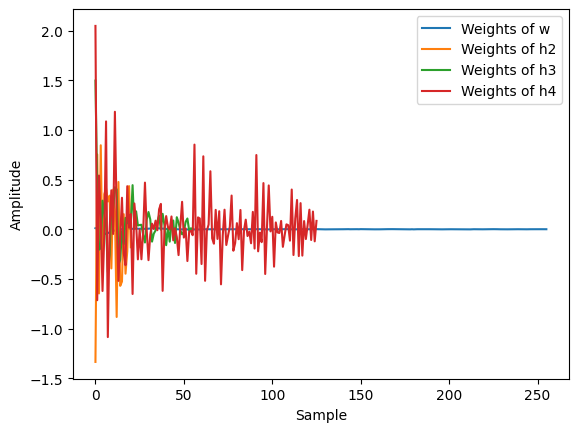

In [75]:

# Read the WAV file
fs, x = wavfile.read("pedal_/whitenoise.wav", mmap=False)
fs, d = wavfile.read("pedal_/Setting4no_latency.wav", mmap=False)
# Example usage:
processor = SignalProcessor(fs)

x = x.astype(float)[:10000]
d = d.astype(float)[:10000]
x /=32768.0
d /= 32768.0
x=x[:,0]
#Plot the results
plt.plot(x,'--', label="input signal")
plt.plot(d, label="Desired signal")
# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()

# Example parmaters setup:
N = 256
mu = 0.28
mu2= 0.01
mu3= 0.001
mu4= 0.001
y, err,w,h2, h3 ,h4= processor.Fourth_order_Volterra_filter(x, d, 
                                                     M=N, L=6, 
                                                     mu1=mu, mu2=mu2,mu3=mu3,mu4=mu4)
mse=processor.custom_mse(d, y)
print("mse:",mse)
print("Estimated error:",np.sqrt(np.mean((err)**2)))
#Plot the results
plt.plot(t,d, label="Desired signal")
plt.plot(t,y,'--', label="Output signal")
plt.plot(t,err,'--',  label="error")
# Add labels and title
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
# Add legend
plt.legend()
# Show the plot
plt.show()



#Plot the results of determined IR weights
plt.plot(w, label="Weights of w")
plt.plot(h2, label="Weights of h2")
plt.plot(h3, label="Weights of h3")
plt.plot(h4, label="Weights of h4")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()
# Show the plot
plt.show()
